#### Mauricio Gonzalez Valero 594595

## 1. Dataset Description and Exploratory Analysis

**Dataset:** Diabetes Dataset (clasificación binaria).

**Objetivo:** predecir si un paciente tiene diabetes.

**Variables predictoras:** Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.

**Variable objetivo:** Outcome (
0 = no diabetes,
1 = diabetes )

https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

En esta celda se carga el dataset y se hace una pequeña revision para checar la calidad de los datos antes de aplicar el PCA.

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.csv")

print("Shape:", df.shape)
display(df.head())

display(df.info())
display(df.describe())

cols_cero_invalido = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print("\nConteo de ceros (posibles faltantes):")
display((df[cols_cero_invalido] == 0).sum().to_frame("zeros"))


Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Conteo de ceros (posibles faltantes):


,zeros
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


Se muestran las 8 variables predictoras numericas y la variable objetivo binaria de Outcome. Tambien se en varios 0 en algunos valores, esto puede significar que son faltantes o no registradas. Ahora se hara una limpieza de datos para tratar estos valores faltantes y evitar alterar la covarianza y variables principales.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


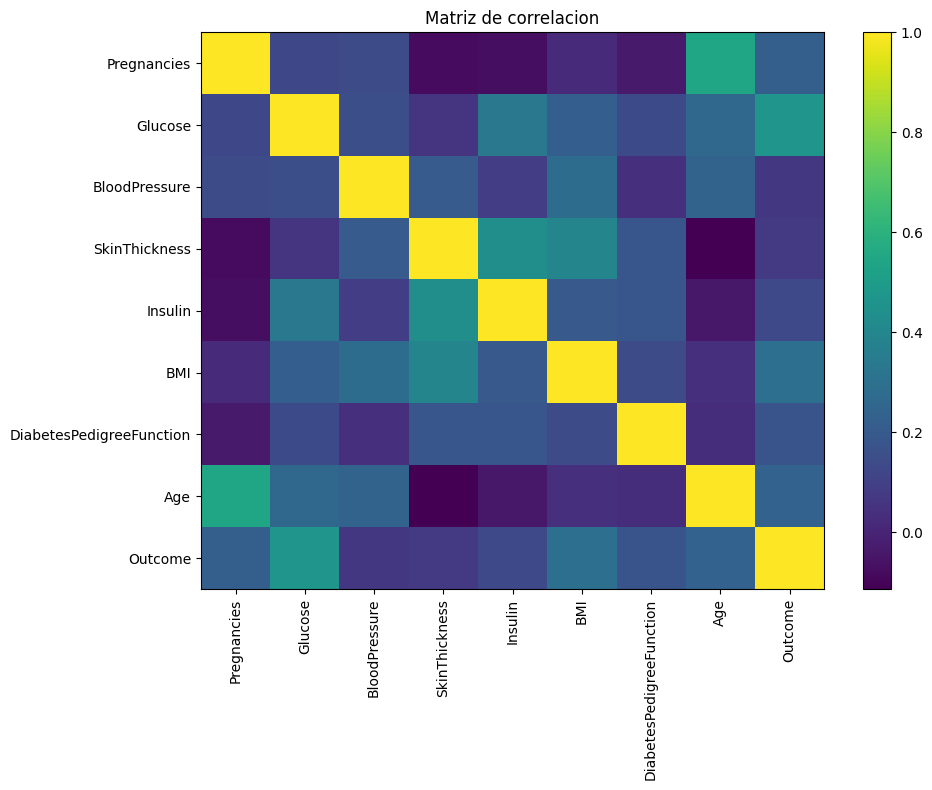

In [13]:
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
display(corr)

plt.figure(figsize=(10,8))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar()
plt.title("Matriz de correlacion")
plt.tight_layout()
plt.show()


Se pueden apreciar en la matriz de correlacion, que hay correlacion entre algunas variables, es decir redundancia de informacion. En este caso PCA va a ser util para reducir diemnsionalidad y tener la mayor varianza posible.

## 2. Principal Component Analysis Procedure

Se necesita hacer una estandarizacion en las variables predictoras, esto porque PCA se basa en la varianza de los datos y ahorita las variables estan en diferentes escalas.

In [14]:
from sklearn.impute import SimpleImputer

cols_cero_invalido = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[cols_cero_invalido] = df[cols_cero_invalido].replace(0, np.nan)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)

Ahora en esta celda vamos a dejar la media 0 y la varianza 1 porque asi es como debe ser para poder hacer PCA

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Despues de limpiar y estandarizar, los datos ahora si estan en una escala comparable y sin valores invalidos. Ahora si estan listos para el PCA.

Ahora vamos a calcular la matriz de covarianza con los datos ya estandarizados. La matriz de covarianza permite analizar como varian las varianles predictoras. Esto nos ayuda a obtener los eigenvalores y eigenvectores que se usan en el PCA.


In [16]:
import numpy as np

cov_matrix = np.cov(X_std, rowvar=False)

cov_matrix


array([[ 1.00130378,  0.12838012,  0.2088874 ,  0.08187643,  0.02508014,
         0.02158684, -0.03356638,  0.54505093],
       [ 0.12838012,  1.00130378,  0.21922263,  0.19286602,  0.41999738,
         0.23134979,  0.13750596,  0.26725715],
       [ 0.2088874 ,  0.21922263,  1.00130378,  0.19214257,  0.04542245,
         0.28162326, -0.00238144,  0.32533901],
       [ 0.08187643,  0.19286602,  0.19214257,  1.00130378,  0.15581316,
         0.54391329,  0.1023215 ,  0.12627161],
       [ 0.02508014,  0.41999738,  0.04542245,  0.15581316,  1.00130378,
         0.18047613,  0.12666802,  0.09722785],
       [ 0.02158684,  0.23134979,  0.28162326,  0.54391329,  0.18047613,
         1.00130378,  0.15363772,  0.02563028],
       [-0.03356638,  0.13750596, -0.00238144,  0.1023215 ,  0.12666802,
         0.15363772,  1.00130378,  0.03360507],
       [ 0.54505093,  0.26725715,  0.32533901,  0.12627161,  0.09722785,
         0.02563028,  0.03360507,  1.00130378]])

Se muestra el grado de relacion lineal entre las variables prefictoras segun la matriz de covarancia. Valores postivios y negativos altos indican fuerte relacion entre las variables, y cuanndo los valores que se acercan a 0 tienen baja o 0 relacion. Cuando hay covarianzas distintas de cero, se conirma que existen dependencias entre las variables y esto justifica el uso de PCA, para reducr la dimensionalidad en los datos.


Ahora su vamos a calcular los eigenvalores y los eigenvectores de la matriz de covarianza. Los eigenvalores dicen cuanta varianza explica cada componente principal y los eigenvectores represental las direcciones cuando esta tiene una varianza maxima.

In [17]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

eig_vals, eig_vecs


(array([2.28596178, 1.49752763, 1.14299279, 0.91772067, 0.7698659 ,
        0.54398406, 0.46906073, 0.38331669]),
 array([[ 3.01434380e-01,  5.57959787e-01,  2.46090734e-02,
          1.60022331e-01,  3.87362967e-01,  1.55010776e-01,
         -5.09124779e-01,  3.71912608e-01],
        [ 4.23980033e-01, -8.20496918e-02, -4.41560003e-01,
         -2.29081687e-01, -1.74422685e-01, -6.96702371e-01,
         -1.72740507e-01,  1.42822880e-01],
        [ 3.77176713e-01,  1.71980052e-01,  3.05323132e-01,
         -1.11413936e-01, -7.61699289e-01,  2.74859849e-01,
          7.61010195e-02,  2.46982188e-01],
        [ 3.97102719e-01, -3.08746421e-01,  3.98076319e-01,
         -8.38296654e-04,  4.21045491e-01, -1.19453763e-01,
          4.89491456e-01,  3.96697903e-01],
        [ 3.07133920e-01, -2.35780387e-01, -5.74396244e-01,
         -3.19151829e-01,  1.48352769e-01,  6.22223233e-01,
          9.54337786e-02, -3.08659134e-03],
        [ 4.01843677e-01, -3.98489320e-01,  3.80641745e-01,
      

Se puede ver que los eigenvalores indican la cantidad de varianza por componente y los eigenvectores definen la direccion de estos componentes. Si ordenamos los eigenvalores de mayor a menor, se veria que los primeros componentes principales concentran la mayor cantidad de informacion de los datos originales.


Ahora vamos a hacer la matriz de transformacion con los eigenvectores ordenados. Esta matriz sirve para mostrar los datos originales estandarizados sobre el los nuevos componentes principales.

In [18]:
W = eig_vecs

W

array([[ 3.01434380e-01,  5.57959787e-01,  2.46090734e-02,
         1.60022331e-01,  3.87362967e-01,  1.55010776e-01,
        -5.09124779e-01,  3.71912608e-01],
       [ 4.23980033e-01, -8.20496918e-02, -4.41560003e-01,
        -2.29081687e-01, -1.74422685e-01, -6.96702371e-01,
        -1.72740507e-01,  1.42822880e-01],
       [ 3.77176713e-01,  1.71980052e-01,  3.05323132e-01,
        -1.11413936e-01, -7.61699289e-01,  2.74859849e-01,
         7.61010195e-02,  2.46982188e-01],
       [ 3.97102719e-01, -3.08746421e-01,  3.98076319e-01,
        -8.38296654e-04,  4.21045491e-01, -1.19453763e-01,
         4.89491456e-01,  3.96697903e-01],
       [ 3.07133920e-01, -2.35780387e-01, -5.74396244e-01,
        -3.19151829e-01,  1.48352769e-01,  6.22223233e-01,
         9.54337786e-02, -3.08659134e-03],
       [ 4.01843677e-01, -3.98489320e-01,  3.80641745e-01,
        -1.18431671e-02,  6.30197104e-02,  5.53981273e-02,
        -5.02491037e-01, -5.24558713e-01],
       [ 1.56874467e-01, -2.734816

La matriz de transformacion tiene los eigenvectores asociados a los eigenvalores mas grandes, y al multiplicar los datos estandarizados en esta matriz se obtiene una nueva forma de ver los datos en terminos de componentes principales.


Ahora vamos a calcular el porcentaje de varianza por cada componente principal. El analisis nos va poder explicar cuantos componentes son necesarios unicamente para aun quedarnos con la mayor parte de informacion de los datos originales.



In [19]:
explained_variance = eig_vals / np.sum(eig_vals)

cumulative_variance = np.cumsum(explained_variance)

explained_variance, cumulative_variance


(array([0.28537316, 0.18694722, 0.14268806, 0.11456572, 0.09610793,
        0.06790947, 0.05855625, 0.0478522 ]),
 array([0.28537316, 0.47232037, 0.61500844, 0.72957415, 0.82568209,
        0.89359156, 0.9521478 , 1.        ]))

Grafica simple para visualizar los componentes que bastan.

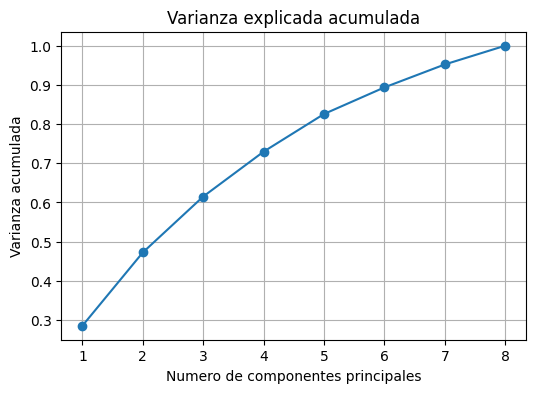

In [20]:
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Numero de componentes principales")
plt.ylabel("Varianza acumulada")
plt.title("Varianza explicada acumulada")
plt.grid()
plt.show()


Se puede ver en la grafica de varianza acumulada que los primeros componentes principales tienen una mayor porporcion de la varianza total. Es decir, que si es posible reducir al dimensionalidad de los datos conservando la mayor cantidad de informacion importante.

Ahora vamos a ver los datos estandarizados sobre los primeros 3 componentes principales y como se ven en un espacio tridimencional para analizar la estructura y posible separacion de las clases.


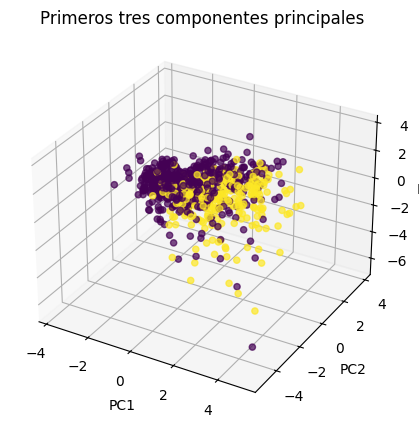

In [21]:
from mpl_toolkits.mplot3d import Axes3D

W_3 = eig_vecs[:, :3]

X_pca_3 = X_std @ W_3

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3[:, 0],
    X_pca_3[:, 1],
    X_pca_3[:, 2],
    c=y,
    cmap='viridis',
    alpha=0.7
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Primeros tres componentes principales")

plt.show()


Esta proyeccion nos permite ver la distribuicion de los datos en un espacio de menor dimensionalidad. Se puede ver una separacion entre las clases, y esto indica que los primeros componentes principales conservan la informacionimportante de los datos originales.

Ahora vamos a hacer lo mismo de proyectar los datos estandarizados sobre los primeros 3 componentes principales pero ahora se vana. visualizar sobre un plano bidimensional para analiar otra vez la separacion de clases.


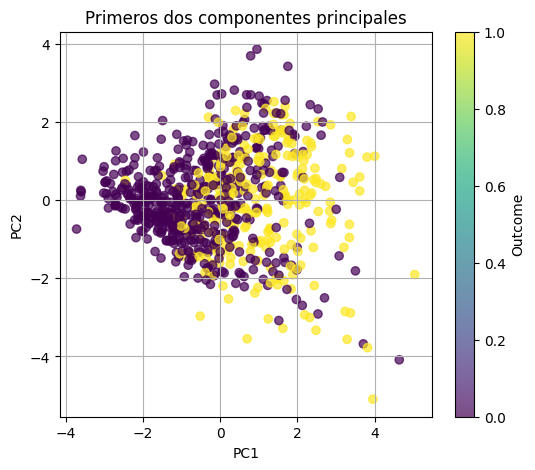

In [22]:
W_2 = eig_vecs[:, :2]

X_pca_2 = X_std @ W_2

plt.figure(figsize=(6,5))
plt.scatter(
    X_pca_2[:, 0],
    X_pca_2[:, 1],
    c=y,
    cmap="viridis",
    alpha=0.7
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Primeros dos componentes principales")
plt.colorbar(label="Outcome")
plt.grid()
plt.show()


La proyeccion de 2 dimensiones tambien muestra que los primeros componentes principales conservan informacion importante suficiente para distinguir entre clases. Esto confirma que PCA logra una reduccion de dimensionalidad, manteniendo la estrutucra principal de los datos.

## 3. Conclusions

En esta tercer tarea se practico el PCA (Analisis de Componentes Principales) aplicandoselo a un dataset de clasificacion binari, que trata sobre la diabetes. Con el analisis exploratorio se identificaron las variables correlacionadas, es decir que si se puede justificar el uso de PCA ára reducir la dimensionalidad.
Los resultados dieron a entender que los primeros componentes principales tenian mayor parte de la varianza de los datos originales. Esto permitio reducir a 3 variables sin perder informacion importante. La proyecciones en 2 y 3 dimensiones indican que la estructura principal de los datos se conserva aun asi despues de la transformacion.
Gracias a esta actividad se confirma que para poder lograr una representacion mas compacta de un conjunto de datos se necesita el uso de PCA, este puede beneficiar el entremiento de models neuronales reduciendo la complejidad, el ruido y el riesgo de sobreajuste.


#### Github Repository:
https://github.com/maugonzalezv/02-Principal-Component-Analysis

## 4. References


- Kaggle. *Diabetes Dataset*.  
  https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

- Pearson, K. (1901). *On lines and planes of closest fit to systems of points in space*.  
  Philosophical Magazine, Series 6, 2(11), 559–572.

